In [2]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
base_path = os.getcwd()

train = pd.read_csv(os.path.join(base_path, 'train.csv'))
test = pd.read_csv(os.path.join(base_path, 'test.csv'))
submission =  pd.read_csv(os.path.join(base_path, 'gender_submission.csv'))

In [99]:
test = pd.read_csv(os.path.join(base_path, 'test.csv'))

# EDA



In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


0    549
1    342
Name: Survived, dtype: int64

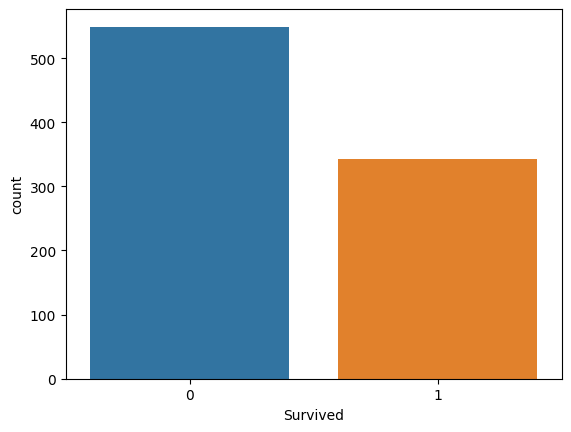

In [58]:
sns.countplot(x='Survived', data=train)
train['Survived'].value_counts()

<Axes: xlabel='Sex', ylabel='count'>

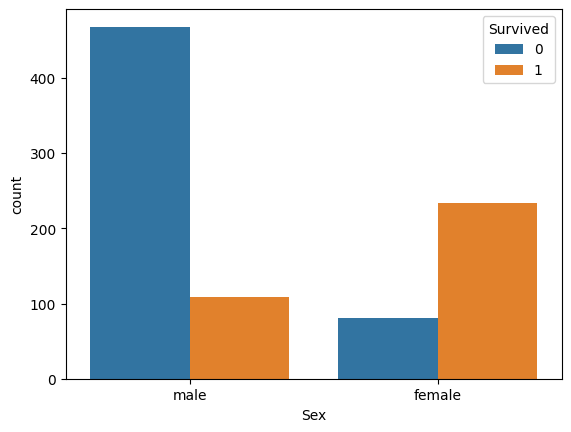

In [59]:
sns.countplot(data=train, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

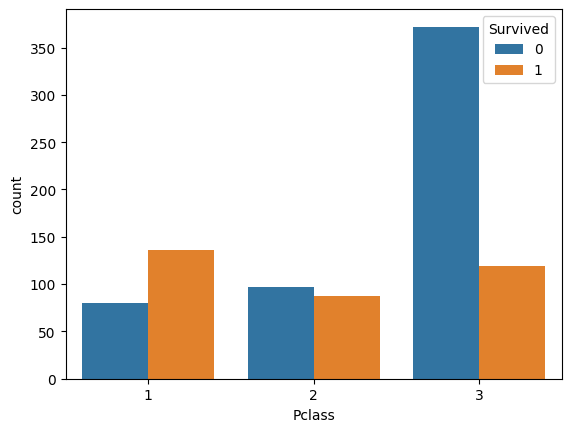

In [60]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [63]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: xlabel='Age', ylabel='Count'>

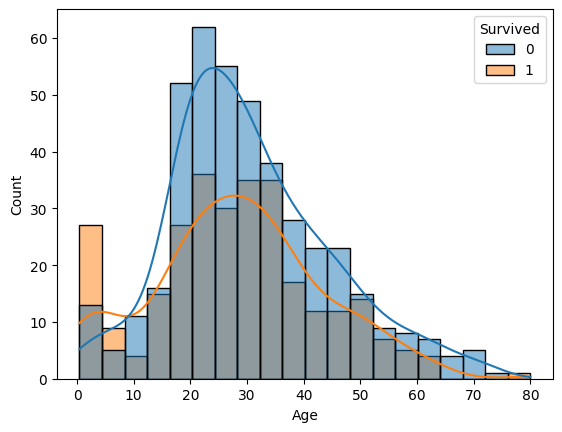

In [61]:
sns.histplot(x='Age', hue='Survived', data=train, kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

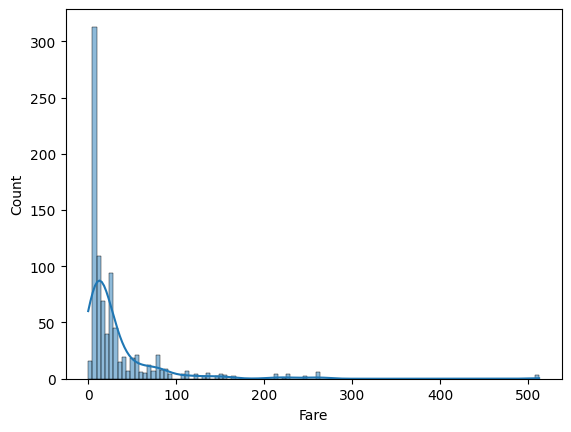

In [62]:
sns.histplot(x='Fare', data=train, kde=True)

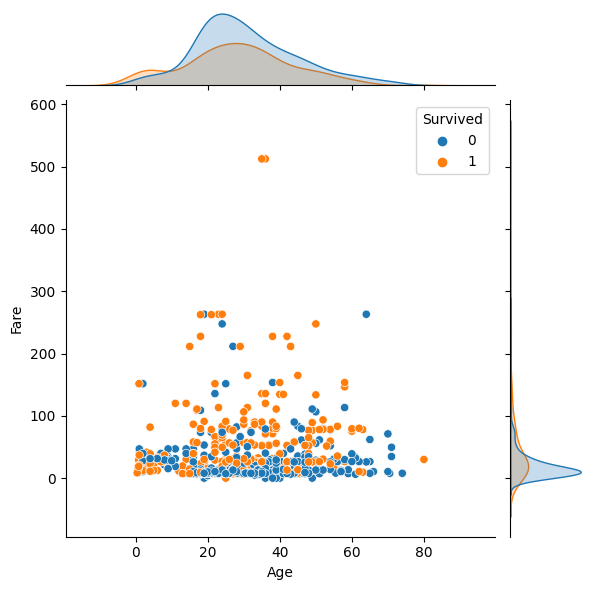

In [68]:
sns.jointplot(x='Age', y='Fare', data=train, hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

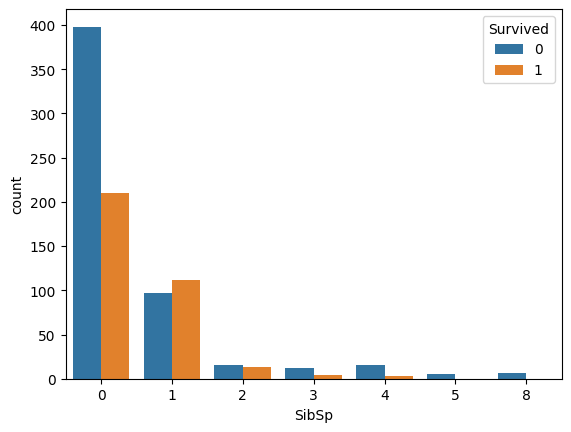

In [70]:
sns.countplot(x='SibSp', hue='Survived', data=train)

<Axes: xlabel='Parch', ylabel='count'>

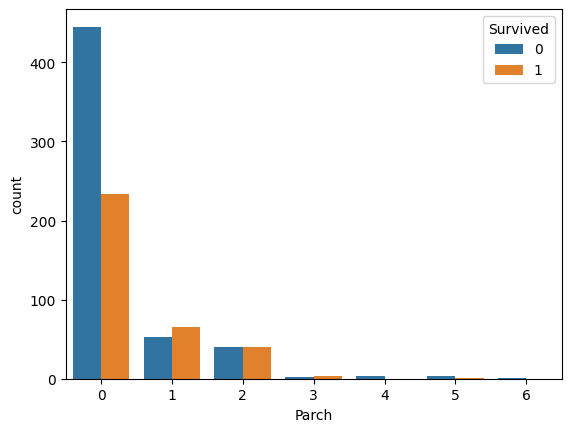

In [71]:
sns.countplot(x='Parch', hue='Survived', data=train)

<Axes: xlabel='FamilySize', ylabel='count'>

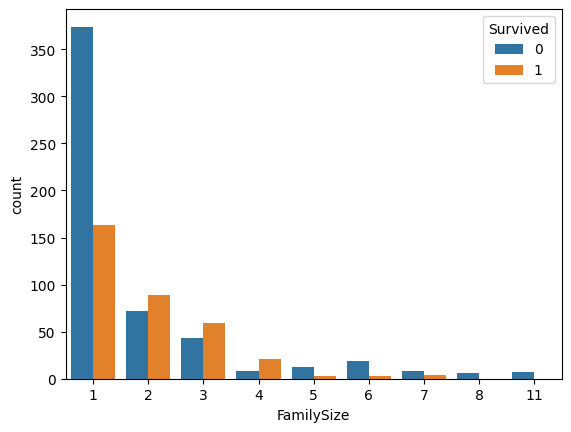

In [69]:
sns.countplot(data=train, x='FamilySize',hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

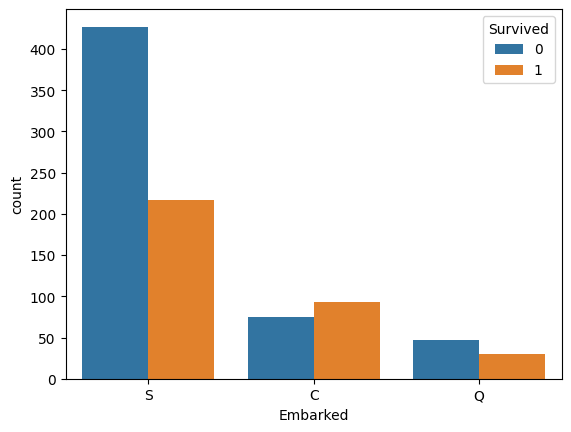

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=train)

# Data Preprocessing & Feature Engineering

## Missing Value

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Nuclear      891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [3]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['Nuclear'] = train['FamilySize'].apply(lambda x: 1 if x >=2 and x <= 4 else 0)

<Axes: xlabel='Nuclear', ylabel='count'>

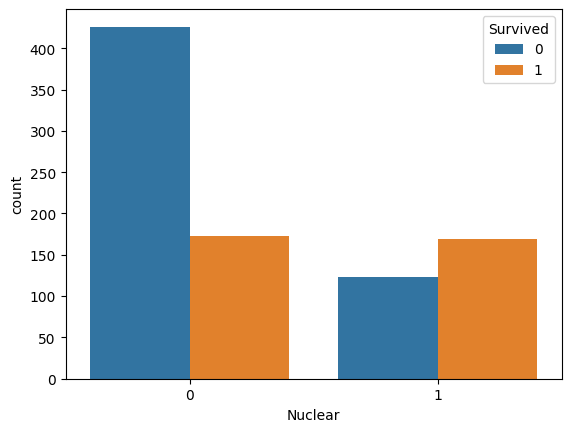

In [86]:
sns.countplot(x='Nuclear', data=train, hue='Survived')

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
# Age, Cabin, Embarked has missing Value
# First Age columns
age_mean = train.groupby(['Pclass', 'Sex'])['Age'].mean()
train['Age'] = train.apply(
    lambda row: age_mean.loc[(row['Pclass'], row['Sex'])] if pd.isna(row['Age']) else row['Age'],
    axis=1
)
train['Age'].isna().sum()

0

In [5]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Embarked'].isna().sum()

0

<Axes: xlabel='Name', ylabel='count'>

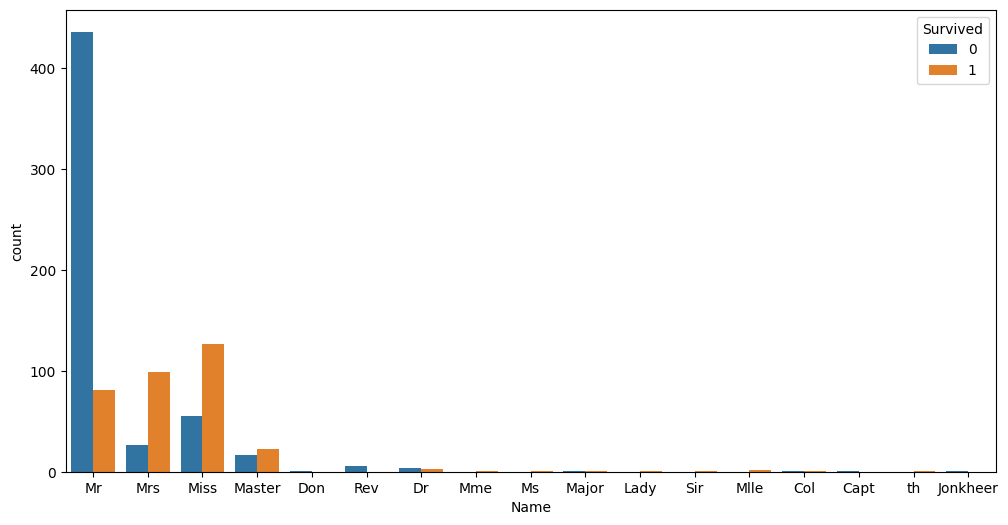

In [6]:
train['Name'] = train.Name.str.split(', ').str[1].str.split('. ').str[0]
train['Master'] = train.Name.apply(lambda x: 1 if x == 'Master' else 0)
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Name', hue='Survived')

In [7]:
# 보
train.loc[(train['Age'] < 21.75), 'Age'] = 0
train.loc[(train['Age'] >= 21.75) & (train['Age'] < 26.508), 'Age'] = 1
train.loc[(train['Age'] >= 26.508) & (train['Age'] < 36.0), 'Age'] = 2
train.loc[(train['Age'] >= 36.0), 'Age'] = 3

# train.loc[(train['Fare'] < 7.854), 'Fare'] = 0
# train.loc[(train['Fare'] >= 7.854) & (train['Fare'] < 10.5), 'Fare'] = 1
# train.loc[(train['Fare'] >= 10.5) & (train['Fare'] < 21.075), 'Fare'] = 2
# train.loc[(train['Fare'] >= 21.075) & (train['Fare'] < 39.688), 'Fare'] = 3
# train.loc[(train['Fare'] >= 39.688), 'Fare'] = 4

# train['Age'].value_counts(), pd.qcut(train['Fare'], 5).value_counts()

In [8]:
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

df_pclass = pd.get_dummies(train['Pclass'])
df_pclass = df_pclass.rename(columns={1 : 'Pclass_1', 2 : 'Pclass_2', 3 : 'Pclass_3'})

train = train.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'FamilySize', 'Pclass'])
train = pd.concat([train, df_pclass], axis=1)
train.head()

,Survived,Sex,Age,Fare,Embarked,Nuclear,Master,Pclass_1,Pclass_2,Pclass_3
0,0,0,1.0,7.2500,S,1,0,0,0,1
1,1,1,3.0,71.2833,C,1,0,1,0,0
2,1,1,1.0,7.9250,S,0,0,0,0,1
3,1,1,2.0,53.1000,S,1,0,1,0,0
4,0,0,2.0,8.0500,S,0,0,0,0,1


In [9]:
train.isna().sum()

Survived    0
Sex         0
Age         0
Fare        0
Embarked    0
Nuclear     0
Master      0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

In [10]:
X = pd.get_dummies(train.drop(columns=['Survived']))
y = train['Survived']

In [11]:
X

,Age,Fare,Nuclear,Master,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,1.0,7.2500,1,0,0,0,1,1,0,0,0,1
1,3.0,71.2833,1,0,1,0,0,0,1,1,0,0
2,1.0,7.9250,0,0,0,0,1,0,1,0,0,1
3,2.0,53.1000,1,0,1,0,0,0,1,0,0,1
4,2.0,8.0500,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,13.0000,0,0,0,1,0,1,0,0,0,1
887,0.0,30.0000,0,0,1,0,0,0,1,0,0,1
888,1.0,23.4500,1,0,0,0,1,0,1,0,0,1
889,1.0,30.0000,0,0,1,0,0,1,0,1,0,0


# Training

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from functools import partial
import optuna

from sklearn.metrics import accuracy_score, confusion_matrix
evaluation_metric = accuracy_score

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(846, 12) (45, 12) (846,) (45,)


In [20]:
xgb_model = XGBClassifier()

print("\nFitting XGBoost...")
xgb_model.fit(X_train, y_train)
print("Accuracy : %.4f" % evaluation_metric(y_train, xgb_model.predict(X_train)))


Fitting XGBoost...
Accuracy : 0.9326


In [21]:
rf_model = RandomForestClassifier()

print("\nFitting RF...")
rf_model.fit(X_train, y_train)
print("Accuracy : %.4f" % evaluation_metric(y_train, rf_model.predict(X_train)))


Fitting RF...
Accuracy : 0.9433


# Hyper parameter tuning (Optuna)

In [63]:
def xgb_optimizer(trial, X, y, K):
    max_depth = trial.suggest_int('max_depth', 5, 15)
    # learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    # n_estimators = trial.suggest_int('n_estimators', 50, 2000)
    reg_lambda = trial.suggest_float('reg_lambda', 0.5, 20.0)
    colsample_bynode = trial.suggest_categorical('colsample_bynode', [0.5, 0.7])
    tree_method = trial.suggest_categorical('tree_method', ['exact', 'hist'])

    model = XGBClassifier(
        max_depth=max_depth,
        learning_rate=0.015996507912737445,
        n_estimators=85,
        reg_lambda=reg_lambda,
        colsample_bynode=colsample_bynode,
        tree_method=tree_method,
        verbose=0,
        random_state=42
    )

    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K, random_state=42, shuffle=True)
    losses = []

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        loss = evaluation_metric(y_val, preds)
        losses.append(loss)


    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(losses)

In [58]:
def rf_optimizer(trial, X, y, K):
    max_depth = trial.suggest_int('max_depth', 13, 20)
    max_features = trial.suggest_float('max_features', 0.5, 0.8)
    # min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    # min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)

    model = RandomForestClassifier(
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=12,
        min_samples_leaf=2,
        n_estimators=n_estimators,
        verbose=0,
        random_state=42
    )

    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K, random_state=42, shuffle=True)
    losses = []

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        loss = evaluation_metric(y_val, preds)
        losses.append(loss)


    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(losses)

In [59]:
K = 5   # Kfold 수
opt_func = partial(rf_optimizer, X=X_train, y=y_train, K=K)

study_rf = optuna.create_study(direction="maximize") # 최소/최대 어느 방향의 최적값을 구할 건지.
study_rf.optimize(opt_func, n_trials=200)

[I 2023-11-30 13:22:42,600] A new study created in memory with name: no-name-59e4d2f1-ffc8-4983-bf83-84ce496039b0
[I 2023-11-30 13:22:44,479] Trial 0 finished with value: 0.8380856247824573 and parameters: {'max_depth': 17, 'max_features': 0.7529659473727561, 'n_estimators': 167}. Best is trial 0 with value: 0.8380856247824573.
[I 2023-11-30 13:22:45,339] Trial 1 finished with value: 0.8321754263835711 and parameters: {'max_depth': 20, 'max_features': 0.5535706398630101, 'n_estimators': 79}. Best is trial 0 with value: 0.8380856247824573.
[I 2023-11-30 13:22:47,363] Trial 2 finished with value: 0.8345492516533242 and parameters: {'max_depth': 18, 'max_features': 0.6075152622898569, 'n_estimators': 192}. Best is trial 0 with value: 0.8380856247824573.
[I 2023-11-30 13:22:49,204] Trial 3 finished with value: 0.8333449356073791 and parameters: {'max_depth': 18, 'max_features': 0.5593406658038846, 'n_estimators': 176}. Best is trial 0 with value: 0.8380856247824573.
[I 2023-11-30 13:22:52,

In [64]:
K = 5   # Kfold 수
opt_func = partial(xgb_optimizer, X=X_train, y=y_train, K=K)

study_xgb = optuna.create_study(direction="maximize") # 최소/최대 어느 방향의 최적값을 구할 건지.
study_xgb.optimize(opt_func, n_trials=200)

[I 2023-11-30 13:51:20,762] A new study created in memory with name: no-name-4a143248-60de-4a86-b76e-f468343d8201
[I 2023-11-30 13:51:21,166] Trial 0 finished with value: 0.8274625826662027 and parameters: {'max_depth': 9, 'reg_lambda': 7.775692619718112, 'colsample_bynode': 0.5, 'tree_method': 'exact'}. Best is trial 0 with value: 0.8274625826662027.
[I 2023-11-30 13:51:21,458] Trial 1 finished with value: 0.8062234597981204 and parameters: {'max_depth': 12, 'reg_lambda': 19.037533052791094, 'colsample_bynode': 0.7, 'tree_method': 'hist'}. Best is trial 0 with value: 0.8274625826662027.
[I 2023-11-30 13:51:21,746] Trial 2 finished with value: 0.814500522102332 and parameters: {'max_depth': 8, 'reg_lambda': 17.125517642962883, 'colsample_bynode': 0.7, 'tree_method': 'hist'}. Best is trial 0 with value: 0.8274625826662027.
[I 2023-11-30 13:51:22,156] Trial 3 finished with value: 0.8050400278454578 and parameters: {'max_depth': 8, 'reg_lambda': 16.72347132529007, 'colsample_bynode': 0.7,

In [61]:
optuna.visualization.plot_optimization_history(study_rf)

In [62]:
optuna.visualization.plot_param_importances(study_rf)

In [60]:
study_rf.best_params, study_rf.best_value

({'max_depth': 16, 'max_features': 0.7685107430267129, 'n_estimators': 88},
 0.8475530804037591)

In [65]:
optuna.visualization.plot_optimization_history(study_xgb)

In [66]:
optuna.visualization.plot_param_importances(study_xgb)

In [67]:
study_xgb.best_params, study_xgb.best_value

({'max_depth': 15,
  'reg_lambda': 0.947497047191717,
  'colsample_bynode': 0.7,
  'tree_method': 'hist'},
 0.8475670031326141)

In [92]:
best_params = study_rf.best_params
best_params['min_samples_split'] = 12
best_params['min_samples_leaf'] = 2
best_model_rf = RandomForestClassifier(**best_params,
                      verbose=0,
                      random_state=42)

best_model_rf.fit(X_train, y_train)
print("Validation Acc: %.4f" % evaluation_metric(y_val, best_model_rf.predict(X_val)))

Validation Acc: 0.8667


In [93]:
best_params = study_xgb.best_params
best_params['learning_rate'] = 0.015996507912737445
best_params['n_estimators'] = 85
best_model_xgb = XGBClassifier(**best_params,
                      verbose=-1,
                      random_state=42)

best_model_xgb.fit(X_train, y_train)
print("Validation Acc : %.4f" % evaluation_metric(y_val, best_model_xgb.predict(X_val)))

Validation Acc : 0.8667


# test

In [100]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Nuclear'] = test['FamilySize'].apply(lambda x: 1 if x >=2 and x <= 4 else 0)

test['Age'] = test.apply(
    lambda row: age_mean.loc[(row['Pclass'], row['Sex'])] if pd.isna(row['Age']) else row['Age'],
    axis=1
)

test['Fare'] = test['Fare'].fillna(test[(test['Pclass_3'] == 1) & (test['Sex_0'] == 1)]['Fare'].mean())

test['Name'] = test.Name.str.split(', ').str[1].str.split('. ').str[0]
test['Master'] = test.Name.apply(lambda x: 1 if x == 'Master' else 0)

test.loc[(test['Age'] < 21.75), 'Age'] = 0
test.loc[(test['Age'] >= 21.75) & (test['Age'] < 26.508), 'Age'] = 1
test.loc[(test['Age'] >= 26.508) & (test['Age'] < 36.0), 'Age'] = 2
test.loc[(test['Age'] >= 36.0), 'Age'] = 3

test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1

df_pclass = pd.get_dummies(test['Pclass'])
df_pclass = df_pclass.rename(columns={1 : 'Pclass_1', 2 : 'Pclass_2', 3 : 'Pclass_3'})

test = test.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'FamilySize', 'Pclass'])
test = pd.concat([test, df_pclass], axis=1)
test = pd.get_dummies(test)
test.head()

,Age,Fare,Nuclear,Master,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,2.0,7.8292,0,0,0,0,1,1,0,0,1,0
1,3.0,7.0000,1,0,0,0,1,0,1,0,0,1
2,3.0,9.6875,0,0,0,1,0,1,0,0,1,0
3,2.0,8.6625,0,0,0,0,1,1,0,0,0,1
4,1.0,12.2875,1,0,0,0,1,0,1,0,0,1


In [115]:
submission['Survived'] = best_model_rf.predict(test)
submission.to_csv(os.path.join(base_path, 'submission_rf.csv'), index=False)

In [116]:
submission['Survived'] = best_model_xgb.predict(test)
submission.to_csv(os.path.join(base_path, 'submission_xgb.csv'), index=False)

<Axes: >

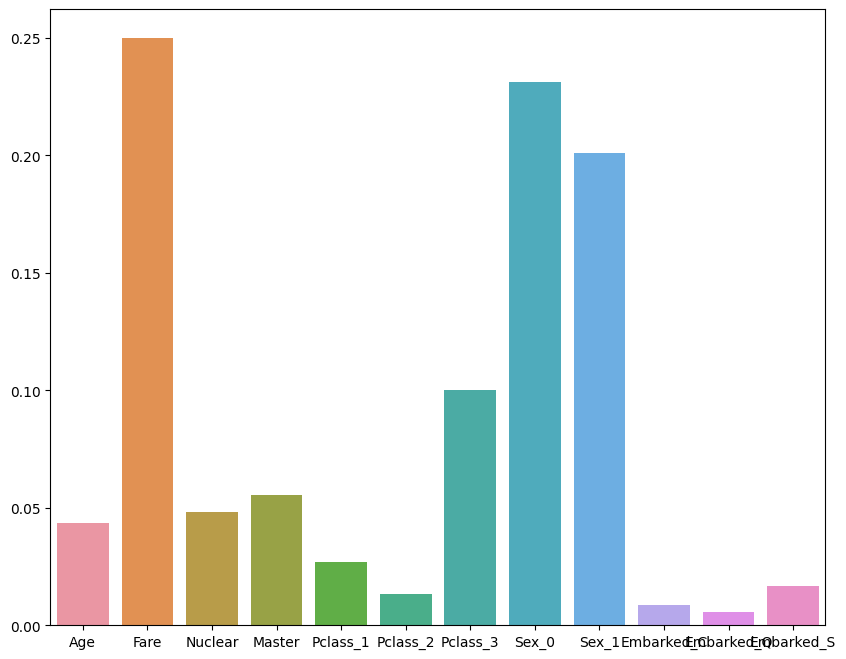

In [118]:
# 1 Random forest
plt.figure(figsize=(10, 8))
sns.barplot(x=X.columns, y=best_model_rf.feature_importances_)

<Axes: >

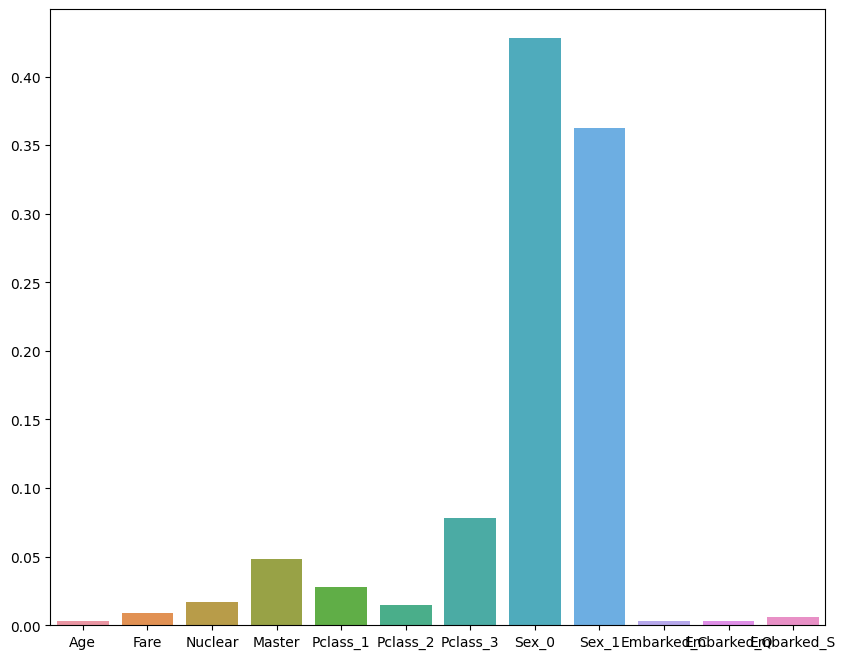

In [119]:
# 1. XGB
plt.figure(figsize=(10, 8))
sns.barplot(x=X.columns, y=best_model_xgb.feature_importances_)